In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [23]:
#Load pairwise and neural likelihood estimators for the evaluation data for single realizations
local_folder = "/home/juliatest/Dropbox/likelihood_free_inference/neural_likelihood/brown_resnick"
image_size = 25
image_name = str(image_size) + "_by_" + str(image_size)
version = "final_version"
distance_constraint = 2
neural_likelihood_estimators_file = (local_folder + "/evaluate_nn/produce_neural_likelihood_estimates/data/25_by_25/" +
                                     version + "/single/reps/200/neural_likelihood_estimators_9_by_9_density_" +
                                     image_name + "_200.npy")
pairwise_likelihood_estimators_file = (local_folder + "/evaluate_nn/produce_pairwise_likelihood_estimates/data/" 
                                    + image_name + "/dist_" + str(distance_constraint) + 
                                    "/single/reps/200/evaluation_pairwise_likelihood_estimators_9_by_9_image_"
                                    + image_name + "_200.npy")
#first column is range and second is smooth
parameter_matrix = np.load((local_folder + "/evaluate_nn/generate_data/data/" + image_name + 
                            "/single/reps/200/evaluation_parameters_9_by_9_density_" + image_name + "_200.npy"))
neural_likelihood_estimators = np.load(neural_likelihood_estimators_file)
pairwise_likelihood_estimators = np.load(pairwise_likelihood_estimators_file)
number_of_reps = 200

In [24]:
#The parameter estimates for the 9 by 9 grid
jittered_pairwise_likelihood_estimators = pairwise_likelihood_estimators + np.random.normal(0, .02, (81, number_of_reps, 2))
jittered_neural_likelihood_estimators = neural_likelihood_estimators + np.random.normal(0, .02, (81, number_of_reps, 2))

In [25]:
ks = [i for i in range(8,-1,-1)]

def visualize_pairwise_and_neural_likelihood_estimates(pairwise_likelihood_estimators, neural_likelihood_estimators,
                                                       parameter_matrix, realization_type,
                                                       jittered_pairwise_likelihood_estimators,
                                                       jittered_neural_likelihood_estimators):
    fig, ax = plt.subplots(nrows = 9, ncols = 9, figsize = (30, 25), sharex = True, sharey = True, squeeze = True)
    plt.xlim(0,2)
    plt.ylim(0,2)
    for i in range(0,9):
        for j in range(0,9):

            k = ks[i]
            current_pairwise_estimators = np.zeros((number_of_reps, 2))
            current_jittered_pairwise_estimators = np.zeros((number_of_reps, 2))
            current_pairwise_estimators[:,0] = pairwise_likelihood_estimators[(j*9+k),:,1]
            current_pairwise_estimators[:,1] = pairwise_likelihood_estimators[(j*9+k),:,0]
            current_jittered_pairwise_estimators[:,0] = jittered_pairwise_likelihood_estimators[(j*9+k),:,1]
            current_jittered_pairwise_estimators[:,1] = jittered_pairwise_likelihood_estimators[(j*9+k),:,0]

            current_neural_estimators = np.zeros((number_of_reps, 2))
            current_jittered_neural_estimators = np.zeros((number_of_reps, 2))
            current_neural_estimators[:,0] = neural_likelihood_estimators[(j*9+k),:,1]
            current_neural_estimators[:,1] = neural_likelihood_estimators[(j*9+k),:,0]
            current_jittered_neural_estimators[:,0] = jittered_neural_likelihood_estimators[(j*9+k),:,1]
            current_jittered_neural_estimators[:,1] = jittered_neural_likelihood_estimators[(j*9+k),:,0]

            ax[i,j].scatter(current_jittered_neural_estimators[:,0], current_jittered_neural_estimators[:,1],
            s = 1.5, marker = 'o', c = 'lime')
            ax[i,j].scatter(current_jittered_pairwise_estimators[:,0], current_jittered_pairwise_estimators[:,1],
            s = 1.5, marker = 'o', c = 'purple')
            true_range = parameter_matrix[(j*9+k),0]
            true_smooth = parameter_matrix[(j*9+k),1]
            params = np.repeat(np.matrix([[true_smooth, true_range]]), repeats = number_of_reps, axis = 0)
            ax[i,j].plot(true_smooth, true_range, marker = '*', markersize = 12, c = 'black')
            pairwise_mse = np.round((np.linalg.norm(current_pairwise_estimators-params)**2)/params.shape[0],2)
            neural_mse = np.round((np.linalg.norm(current_neural_estimators-params)**2)/params.shape[0], 2)
            labels = ["pairwise {}".format(pairwise_mse), "neural {}".format(neural_mse)]
            if((i==0) and (j == 0)):
                labels = ["pairwise mse {}".format(pairwise_mse), "neural mse {}".format(neural_mse)]
                legend_elements = [Line2D([0], [0], marker='o', color='w',
                                markerfacecolor='purple', markersize=17), 
                                Line2D([0], [0], marker='o', color='w',
                                markerfacecolor='lime', markersize=17)]
                ax[i,j].legend(handles=legend_elements, labels = labels, fontsize = 16, loc='lower right')
            else:
                labels = ["{}".format(pairwise_mse), "{}".format(neural_mse)]
                legend_elements = [Line2D([0], [0], marker='o', color='w',
                                markerfacecolor='purple', markersize=12), 
                                Line2D([0], [0], marker='o', color='w',
                                markerfacecolor='lime', markersize = 12)]
                ax[i,j].legend(handles=legend_elements, labels = labels, fontsize = 15)

            if(j == 0):
                ax[i,j].set_yticks([i*.4 for i in range(1, 5)])
                ax[i,j].set_yticklabels([round(.4*i, 1) for i in range(1, 5)], size=20)

            if(i == 3):
                ax[i,j].set_xticks([i*.4 for i in range(1, 5)])
                ax[i,j].set_xticklabels([round(.4*i, 1) for i in range(1, 5)], size=20)
    plt.subplots_adjust(wspace=.1, hspace=.05, left = .1, right = .98, bottom = .1, top = .94)
    fig.text(0.55, 0.04, 'smoothness', ha='center', va='center', fontsize = 40)
    fig.text(0.04, 0.52, 'range', ha='center', va='center', rotation='vertical', fontsize = 40)
    fig.text(0.15, .97, "Neural vs Pairwise Likelihood Estimates", fontsize = 45)
    fig_name = (local_folder + 
            "/evaluate_nn/visualizations/visualize_parameter_estimates/visualizations/9_by_9/dist_" + str(distance_constraint)
            + "/" + realization_type + "/reps/200/pairwise_and_neural_likelihood_estimators_" + image_name + "_200.png")
    plt.savefig(fig_name)

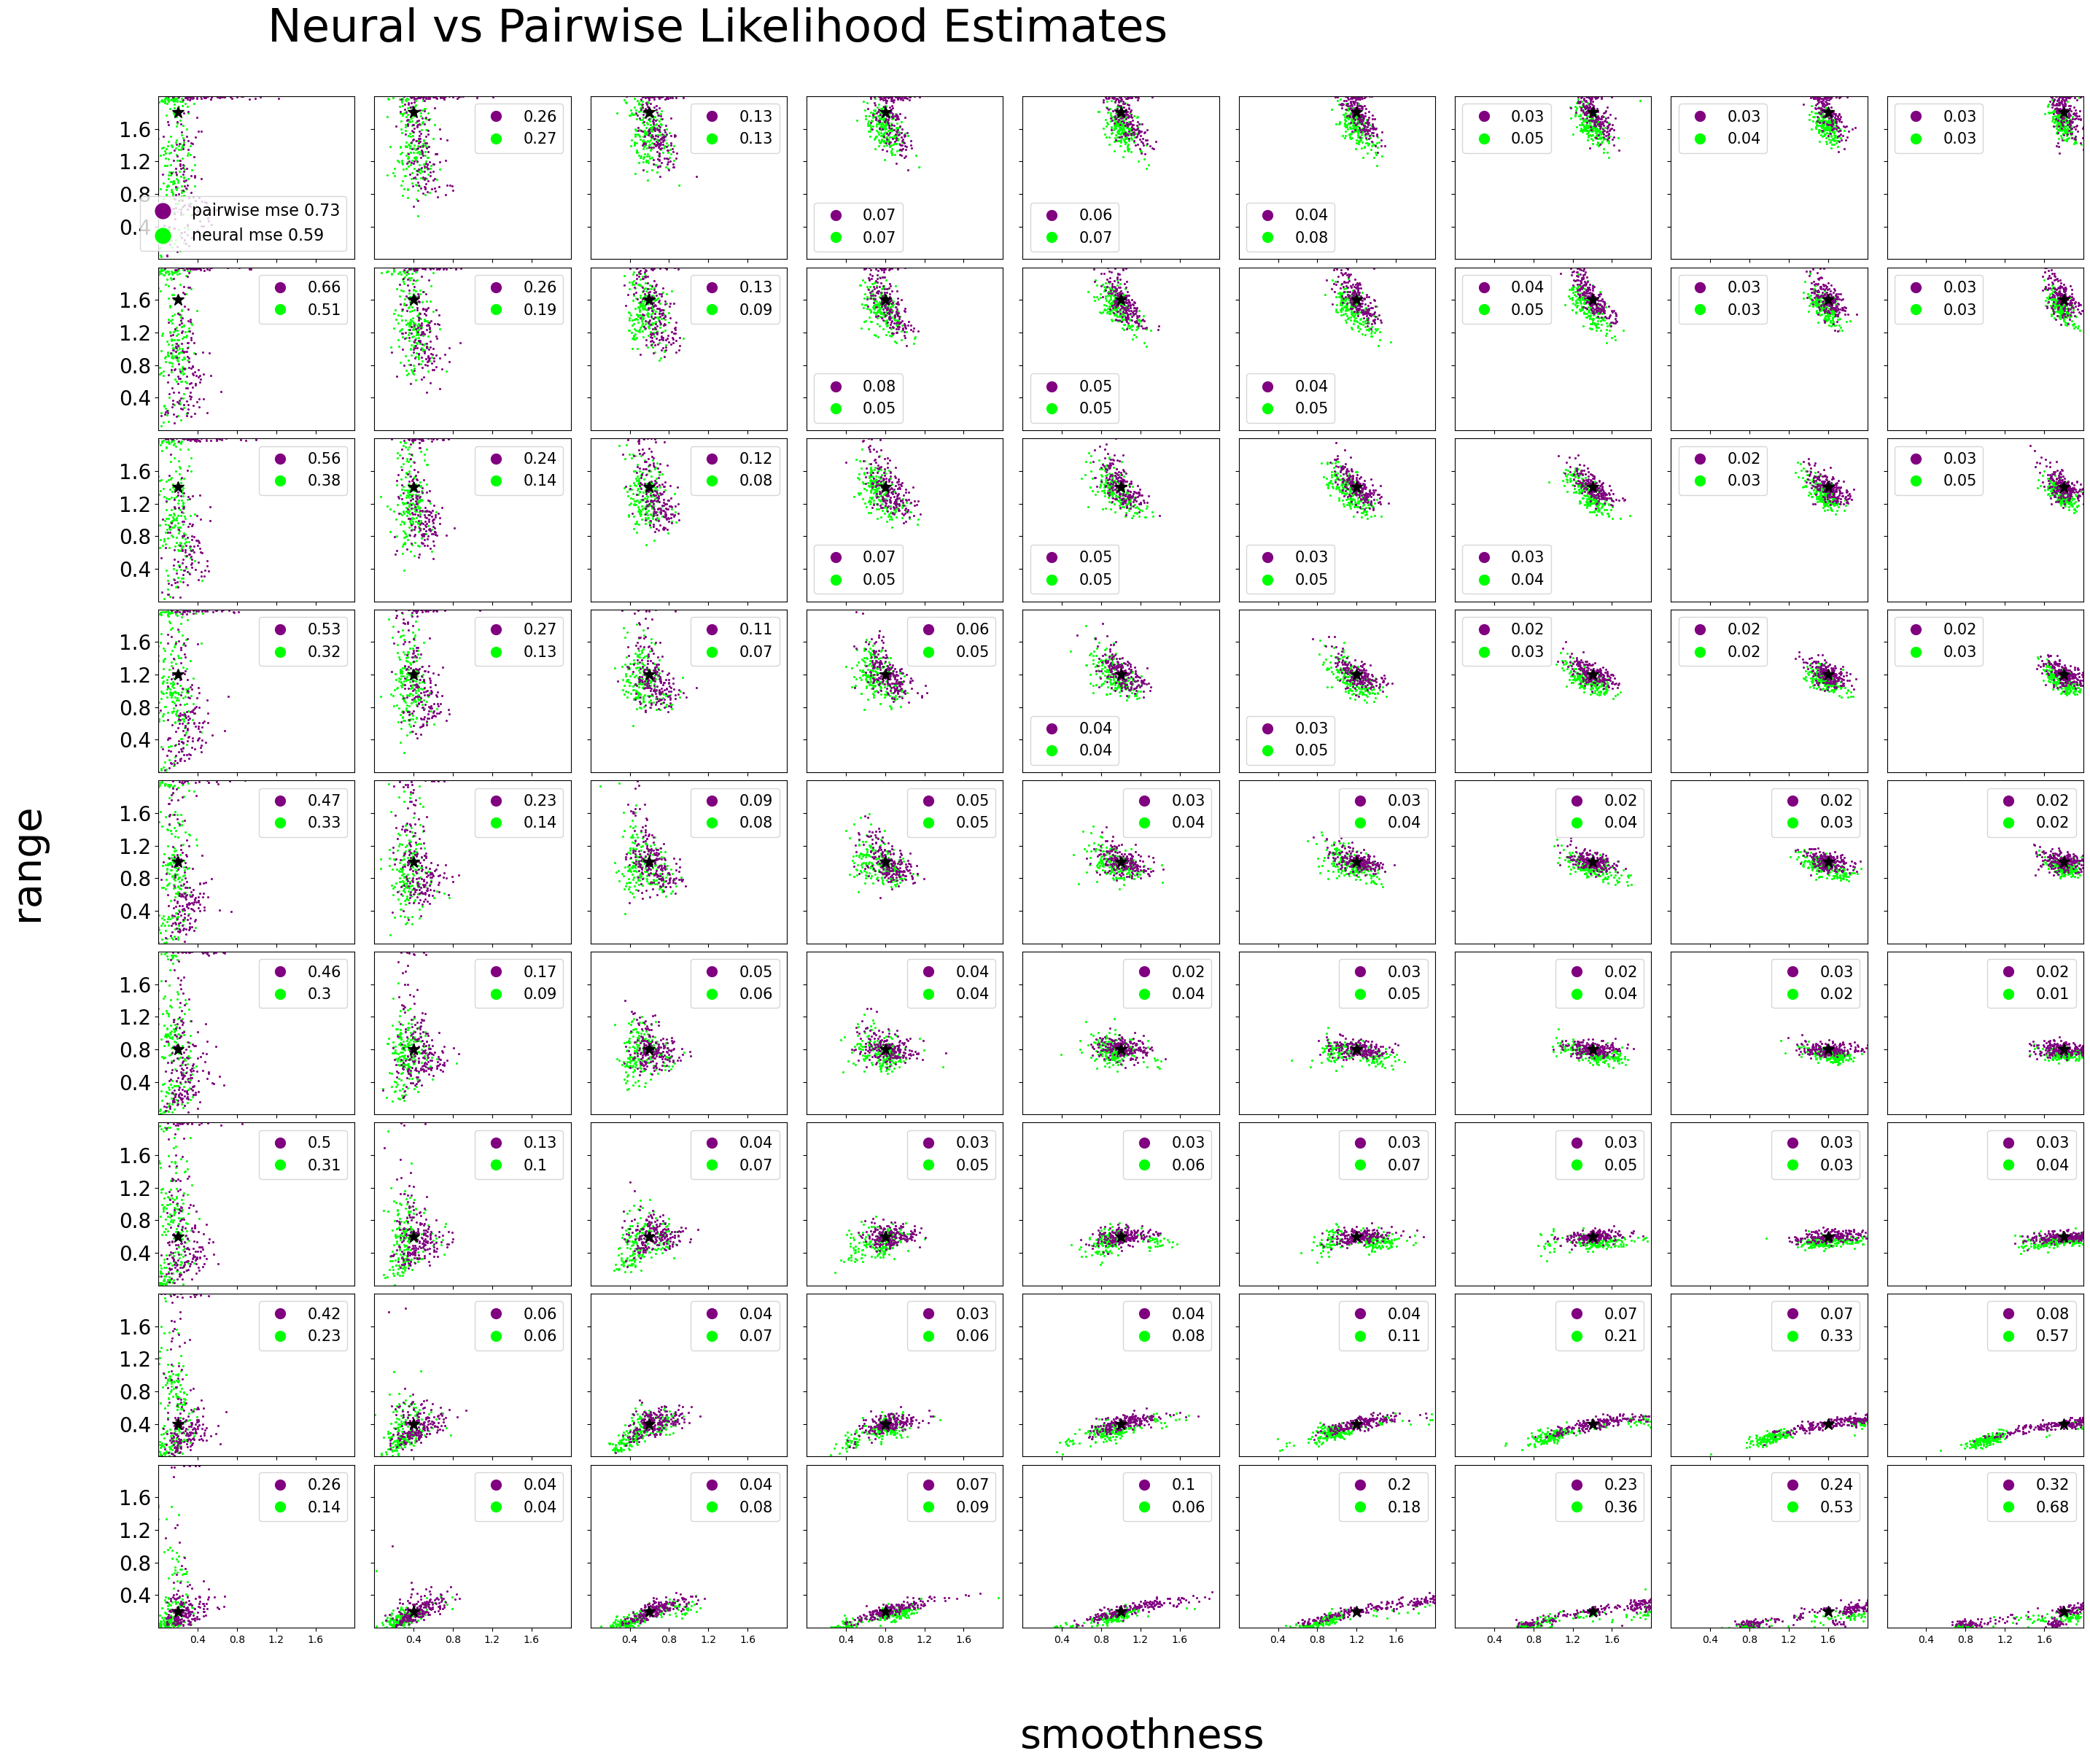

In [26]:
realization_type = "single"
visualize_pairwise_and_neural_likelihood_estimates(pairwise_likelihood_estimators, neural_likelihood_estimators,
                                                   parameter_matrix, realization_type,
                                                   jittered_pairwise_likelihood_estimators,
                                                   jittered_neural_likelihood_estimators)
